In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import discriminability

In [74]:
def ellipses_and_measure(mu0, sigma0, mu1, sigma1):
    discriminability.plot_ellipses(mu0, sigma0, mu1, sigma1)
    print('Jeffreys:', discriminability.mv_normal_jeffreys(mu0, sigma0, mu1, sigma1))

def null_model_example(null_func):
    mu0 = np.array([1., .5])
    mu1 = np.array([.5, 1.])
    sigma0 = np.array([[1.5, 1.], [1., 1.5]])
    sigma1 = np.array([[1.5, 1.], [1., 1.5]])
    ellipses_and_measure(*null_func(mu0, sigma0),
                         *null_func(mu1, sigma1))

Jeffreys: 0.5


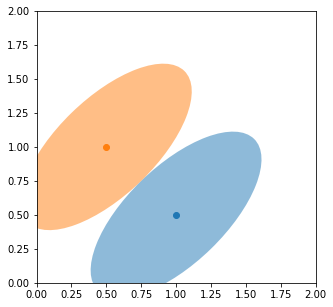

In [72]:
mu0 = np.array([1., .5])
mu1 = np.array([.5, 1.])
sigma0 = np.array([[1.5, 1.], [1., 1.5]])
sigma1 = np.array([[1.5, 1.], [1., 1.5]])
ellipses_and_measure(mu0, sigma0, mu1, sigma1)

## Simple null model: set off-diagonal elements of covariance to zero
For data, we can instead shuffle the data within each component, which should give the same effect for large numbers of data.

In [35]:
def erase_offdiag(mu, sigma):
    """mu is ignored, just there for consistent syntax"""
    return mu, np.diag(np.diag(sigma))

def shuffle_data(x):
    return np.vstack([np.random.permutation(x[:,ii]) for ii in range(x.shape[1])]).T

Jeffreys: 0.166666666667


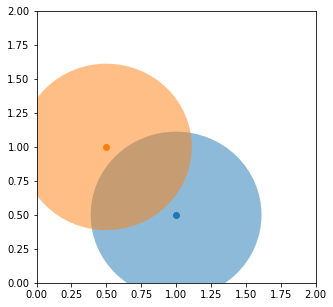

In [75]:
null_model_example(erase_offdiag)

## set off-diagonal components to zero, then scale covariance matrix to fix determinant
This preserves the entropy of the distribution. 

In [65]:
def diag_and_scale(mu, sigma):
    det = np.linalg.det(sigma)
    diag = np.diag(sigma)
    newdet = np.prod(diag)
    diagmat = np.diag(diag)
    size = sigma.shape[0]
    factor = (det / newdet)**(1/size)
    return mu, factor*diagmat

Jeffreys: 0.22360679775


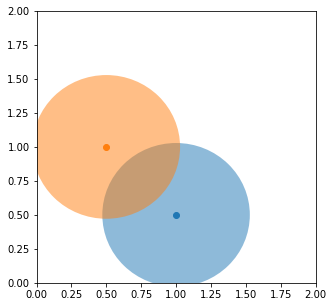

In [76]:
null_model_example(diag_and_scale)

## aggregate over many random rotations of each sigma

In [80]:
def rotate(M, theta):
    """Just the 2D case for now."""
    rotmat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return rotmat.dot(M).dot(rotmat.T)

def random_rotation(mu, sigma):
    theta = np.random.uniform(0,2*np.pi)
    return mu, rotate(sigma, theta)

Jeffreys: 0.197010836688


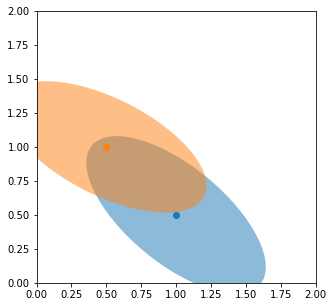

In [92]:
null_model_example(random_rotation)

Jeffreys: 1.44101704427


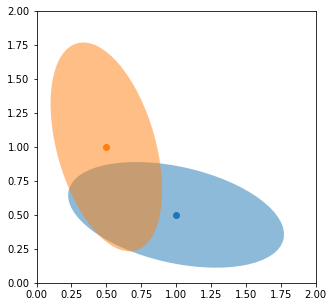

In [87]:
null_model_example(random_rotation)

In [94]:
nsamples = 10000
jeffreys = np.zeros(nsamples)
for ii in range(nsamples):
    rot0 = random_rotation(mu0, sigma0)
    rot1 = random_rotation(mu1, sigma1)
    jeffreys[ii] = discriminability.mv_normal_jeffreys(*rot0, *rot1)

In [104]:
def rot_plot(mu0, sigma0, mu1, sigma1, measure, nsamples=10000):
    values = np.zeros(nsamples)
    for ii in range(nsamples):
        rot0 = random_rotation(mu0, sigma0)
        rot1 = random_rotation(mu1, sigma1)
        values[ii] = measure(*rot0, *rot1)
    fig, ax = plt.subplots(1,1)
    vals, bins, patches = ax.hist(values, bins=50, density=True)
    original = measure(mu0, sigma0, mu1, sigma1)
    ax.vlines(original, 0, np.max(vals))

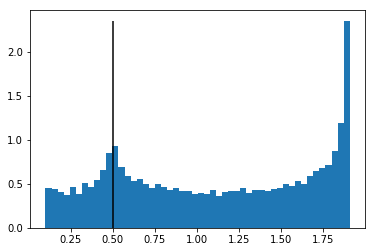

In [105]:
rot_plot(mu0, sigma0, mu1, sigma1, discriminability.mv_normal_jeffreys)

next step: generalize to higher dimensions, calculations from data